# [Elementary Cellular automata](https://en.wikipedia.org/wiki/Elementary_cellular_automaton)

In [1]:
import numpy as np
import PIL.Image
from functools import partial

## Show an image

In [2]:
def show(screen, scale = 8):
    return (
        PIL.Image.fromarray(screen.astype(np.uint8).T*230, 'L')
        .resize((screen.shape[0]*scale,screen.shape[1]*scale), resample=PIL.Image.NEAREST)
    )

In [3]:
width = 32
height = 16
screen = np.ones((width, height), dtype=np.bool_)

In [4]:
screen[10,5]  = 0
screen[14,5]  = 0
screen[12,7]  = 0
screen[ 9,9]  = 0
screen[10,10] = 0
screen[11,10] = 0
screen[12,10] = 0
screen[13,10] = 0
screen[14,10] = 0
screen[15,9]  = 0

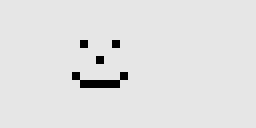

In [5]:
show(screen)

## Manual computation

In [6]:
black = 0
white = 1

In [7]:
# Initialize
width = 256
height = width//2
screen = np.ones((width, height), dtype=np.bool_)
screen[width//2,0] = 0

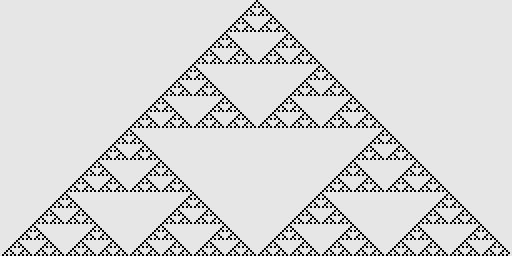

In [8]:
# Manually apply rules
for line in range(1, height):
    for x in range(1, width-1):
        if screen[x+1,line-1] == black and screen[x-1,line-1] == black:
            screen[x,line] = white
        elif screen[x+1,line-1] == black:
            screen[x,line] = black
        elif screen[x-1,line-1] == black:
            screen[x,line] = black
        else:
            screen[x,line] = white
show(screen,scale=2)

## Putting it in a function

In [9]:
def automaton(rule, height=128, random=False):
    width = height*2
    screen = np.ones((width, height), dtype=np.bool_)
    
    if random:
        # random start
        screen[:,0] = np.random.random(width) < 0.5
    else:
        # Single pixel to start
        screen[width//2,0] = 0
    
    for line in range(1, height):
        for x in range(1, width-1):
            a = screen[x-1,line-1]
            b = screen[x,  line-1]
            c = screen[x+1,line-1]
            
            screen[x, line] = rule(a,b,c)
    
    return screen

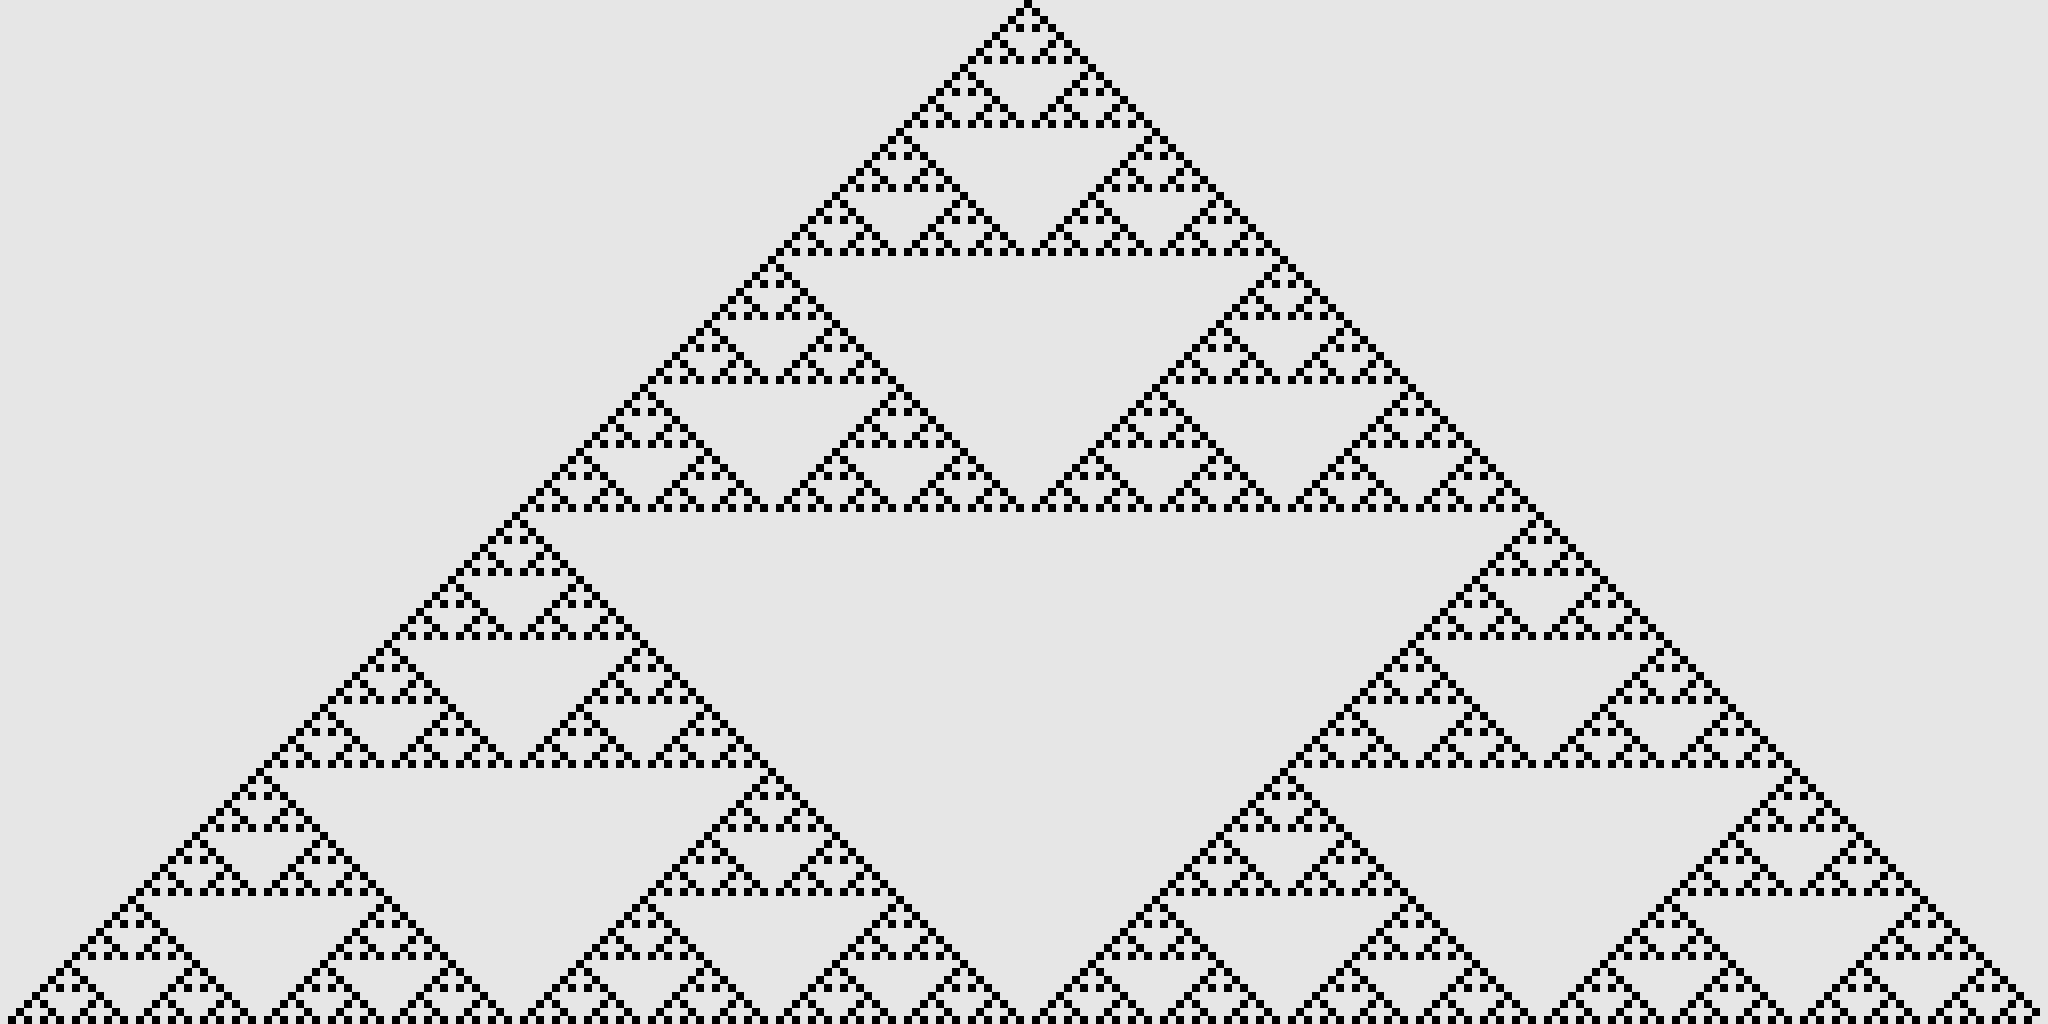

In [10]:
# Equivalent to manual rule
def rule_adrian(a,b,c):
    if a == black and c == black:
        return white
    if a == black:
        return black
    if c == black:
        return black
    return white

show(automaton(rule_adrian))

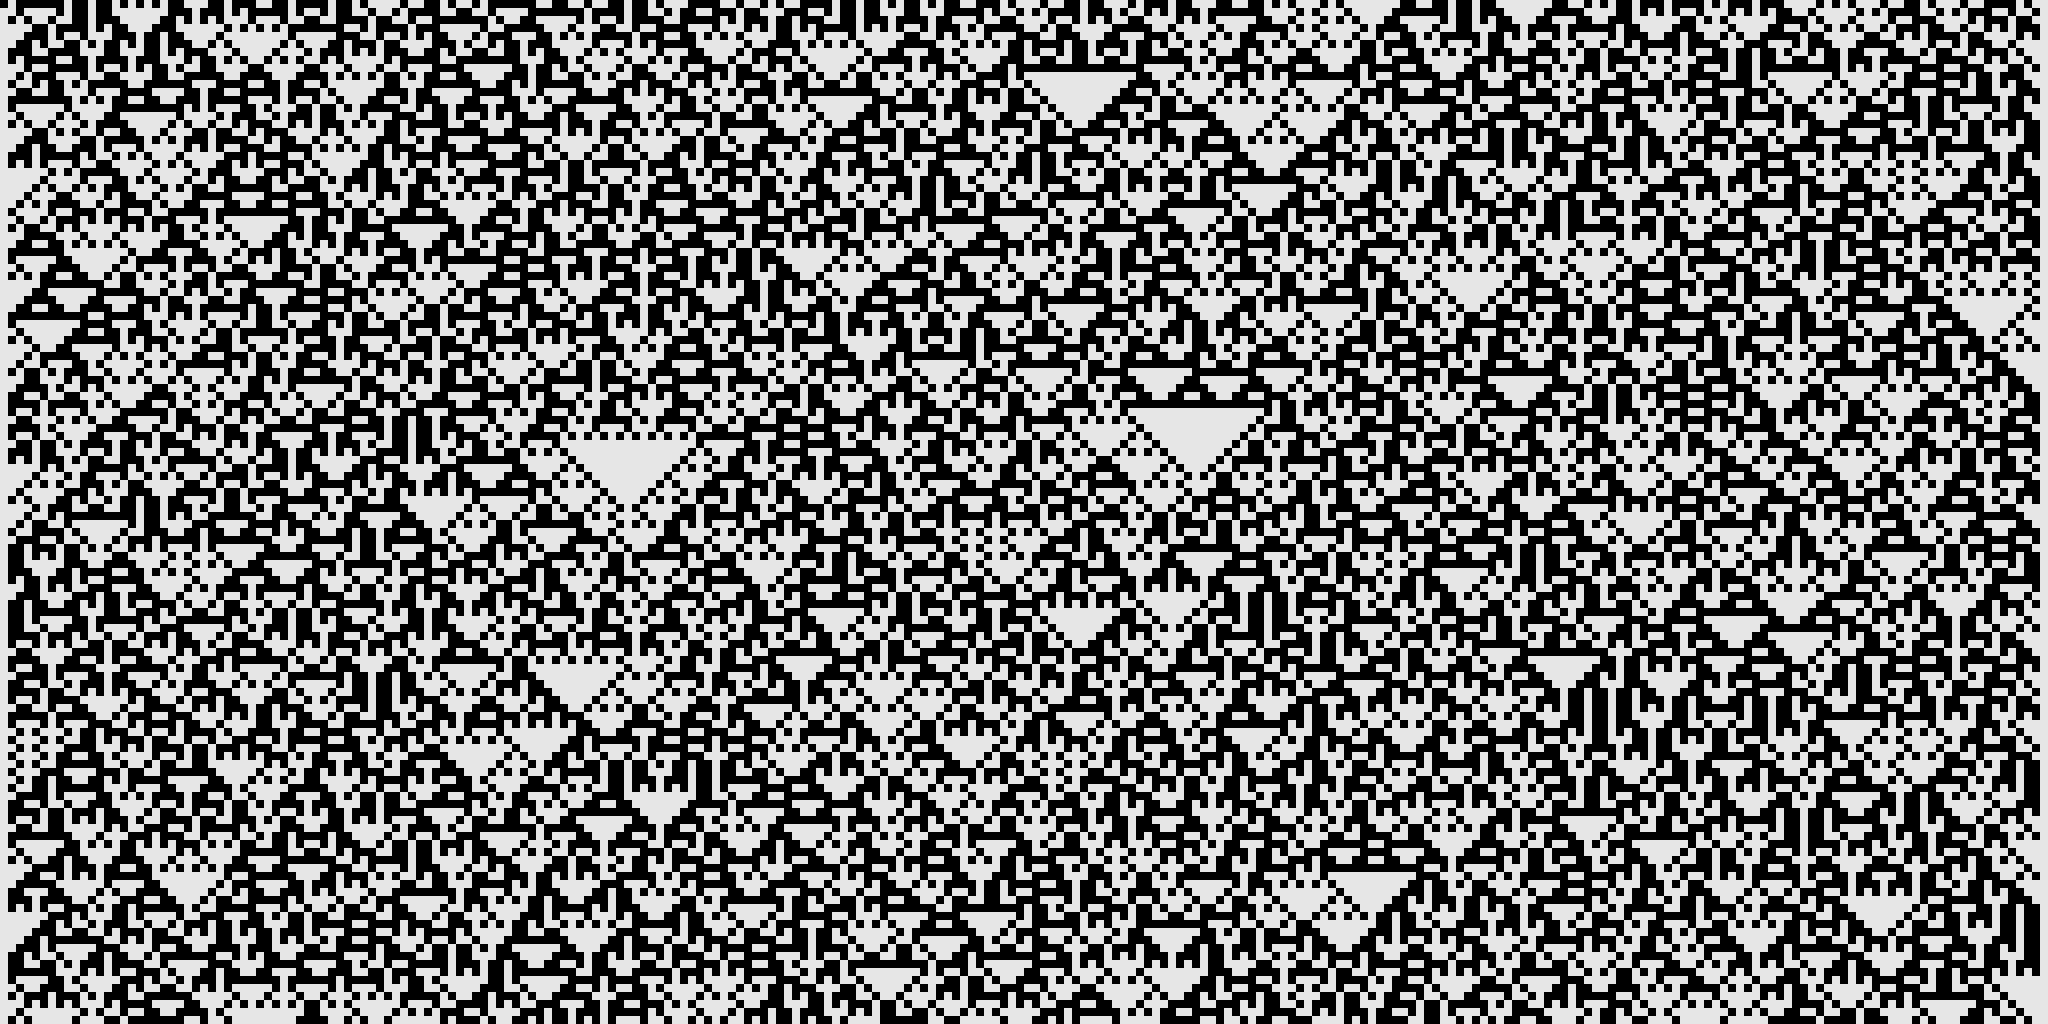

In [11]:
show(automaton(rule_adrian, random=True))

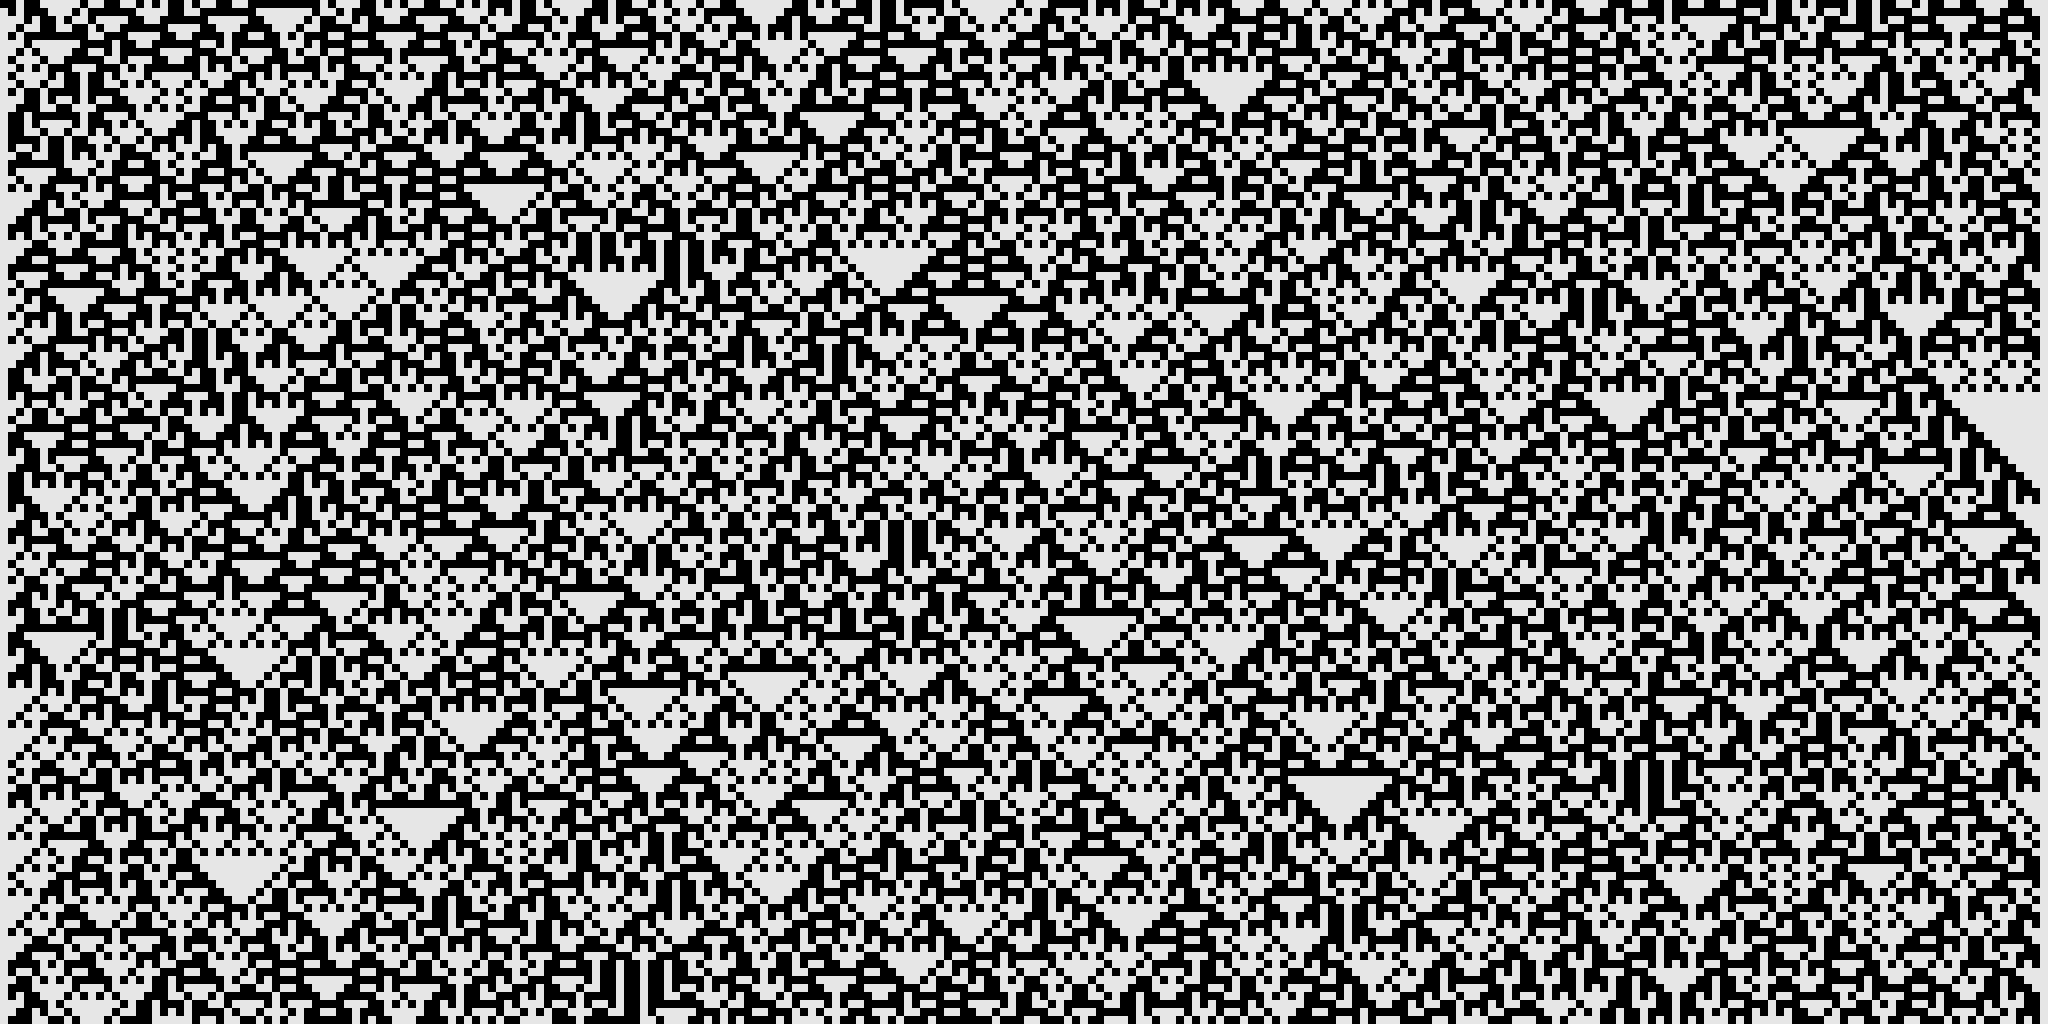

In [12]:
def rule90(a,b,c):
    if a == c:
        return white
    return black

show(automaton(rule90, random=True))

## Decorator version

In [13]:
def single_init(width):
    line = np.ones(width, dtype=np.bool_)
    line[width//2] = 0
    return line

def rand_init(width):
    return np.random.random(width) < 0.5

def automaton_rule(rule):
    """Decorator for 3-bit 1D automata
    
    Usage:
        @automaton_rule
        rule(a:bool,b:bool,c:bool) -> bool: ...
        
    which can then be called like
        rule(width, height, init=single_init)
    """
    def wrapped(rule, width=None, height=None, init=single_init):
        if width is None:
            if height is None:
                width = 256
            else:
                width = height*2
        if height is None:
            height = width//2

        screen = np.zeros((width, height), dtype=np.bool_)

        screen[:,0] = init(width)

        for line in range(1, height):
            for x in range(width):
                a = screen[(x-1 )% width,line-1]
                b = screen[x,  line-1]
                c = screen[(x+1) % width,line-1]

                screen[x, line] = rule(a,b,c)

        return screen
    return partial(wrapped,rule)

def show_rule(rule) -> np.array:
    "Returns a small 10x2 array showing all possible bit patterns"
    def init(width):
        return np.array([0,0,0,1,0,1,1,1,0,0], dtype=np.bool_) # de Bruijn sequence

    return rule(width=10, height=2, init=init)

In [14]:
@automaton_rule
def rule90_automaton(a,b,c):
    "Wolfram rule 90"
    if a == c:
        return white
    return black

show(show_rule(rule90_automaton))

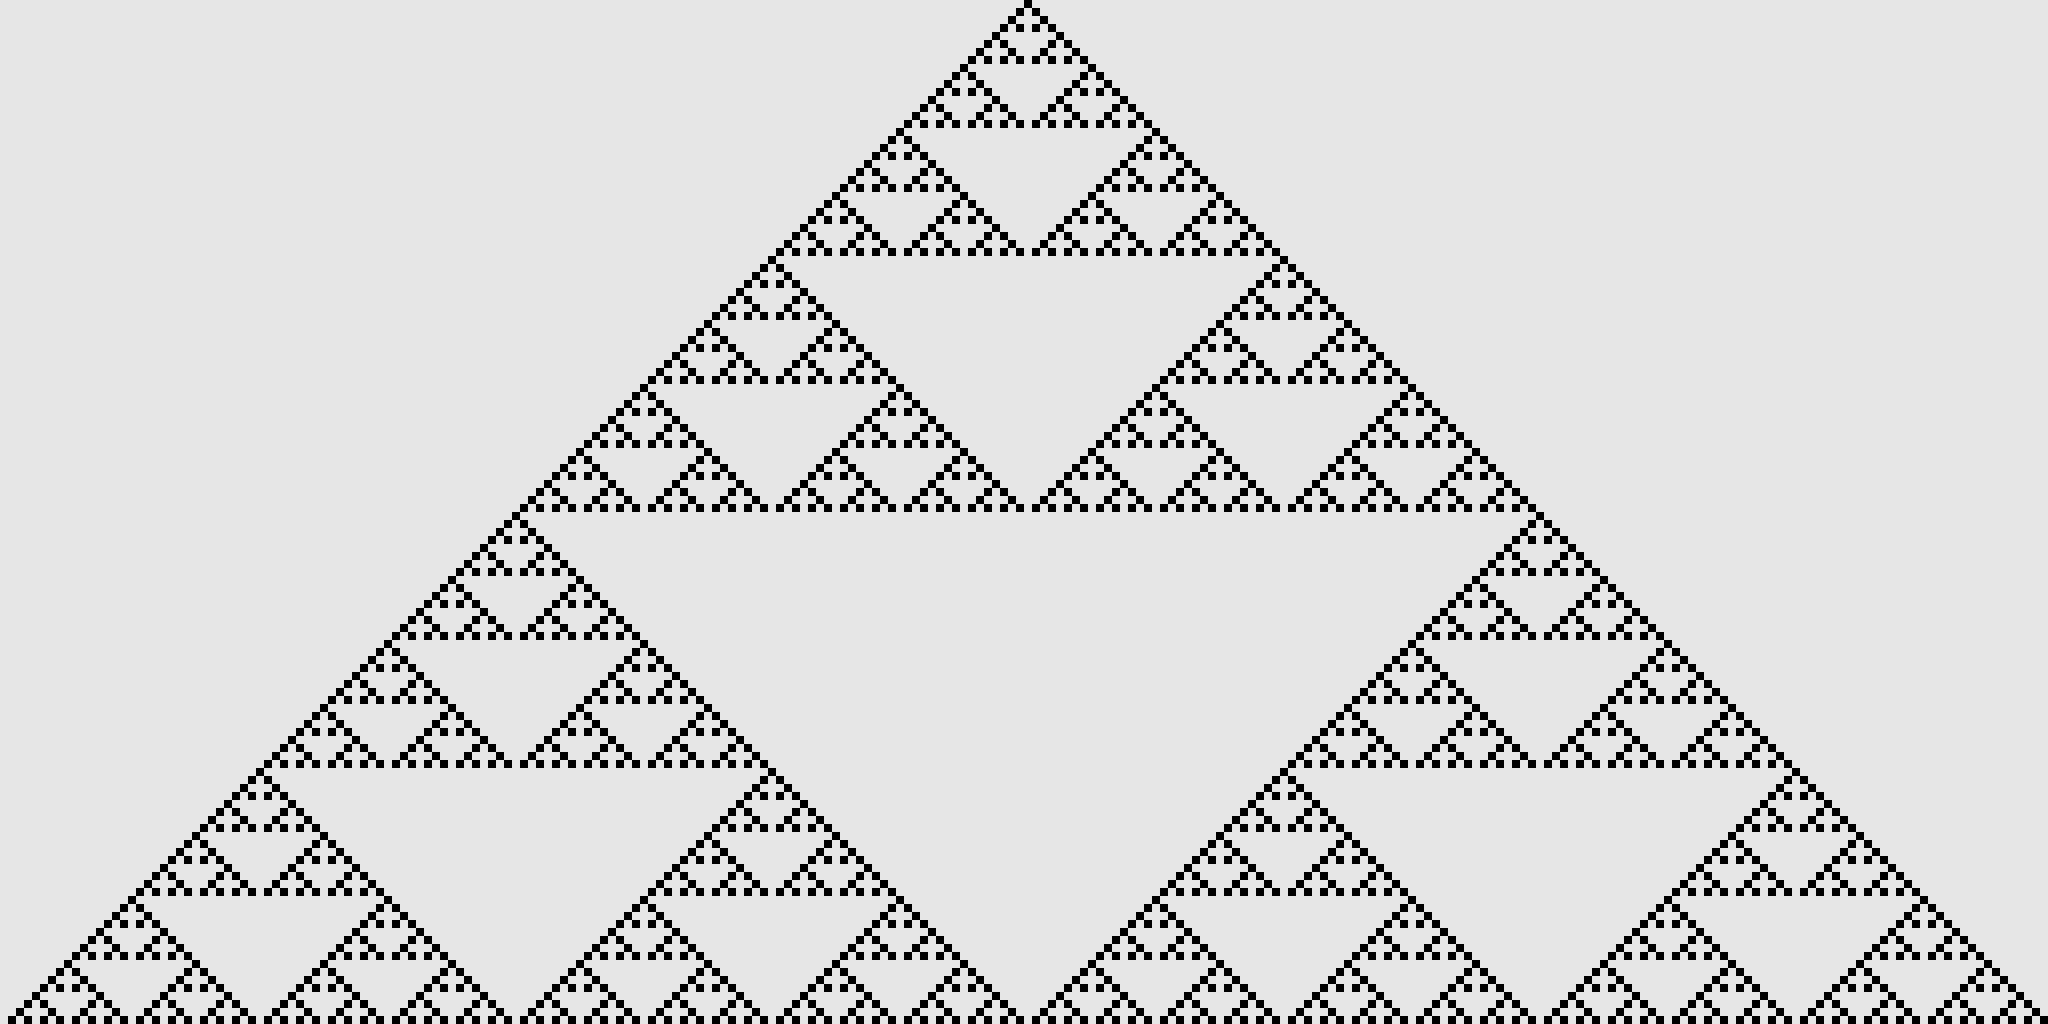

In [15]:
show(rule90_automaton())

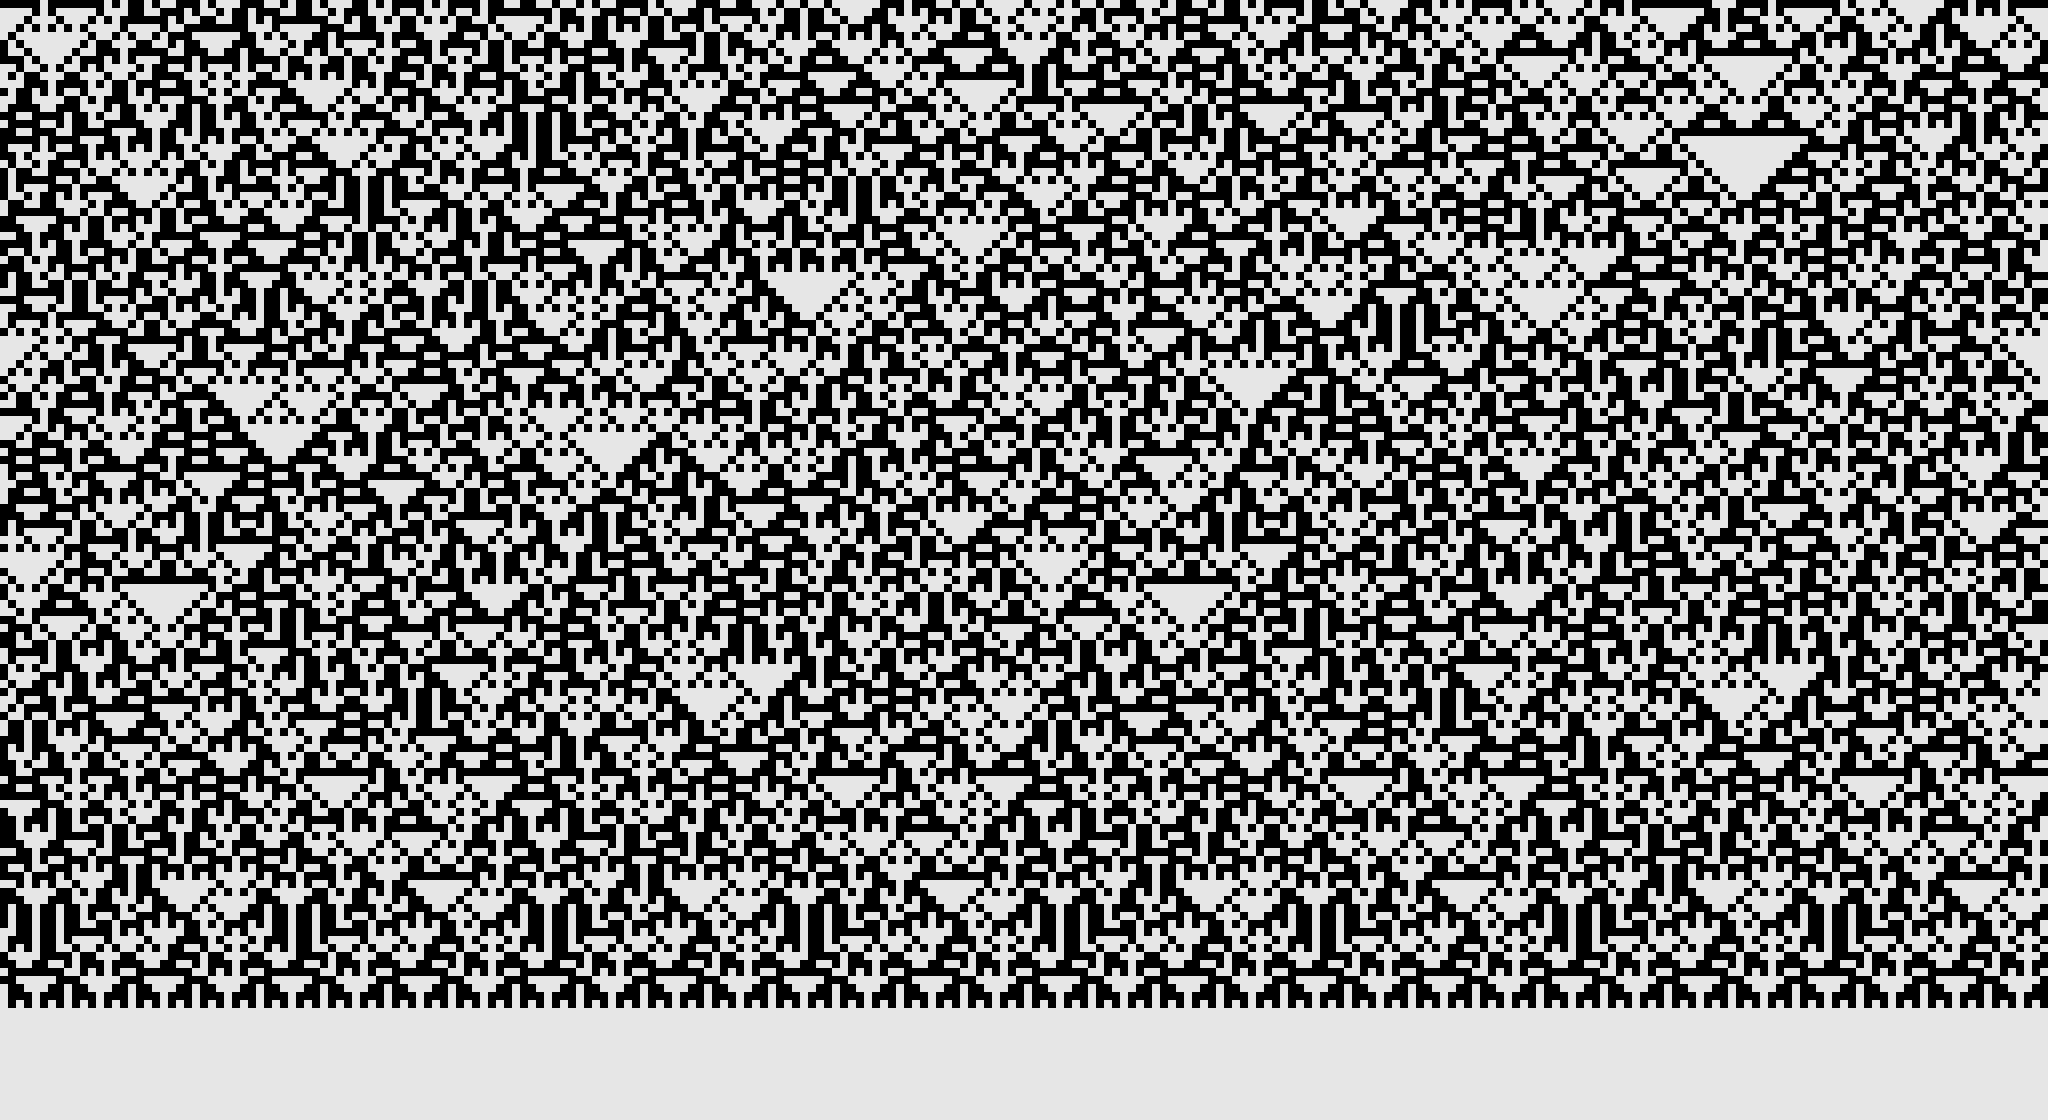

In [16]:
# If width is a power of 2 then it cancels out after width/2 steps
show(rule90_automaton(width=256, height=140, init=rand_init))

In [17]:
def wolfram(n):
    "Generate rules by wolfram number"
    @automaton_rule
    def rule(a,b,c):
        return n & (1<<(~a*4+~b*2+~c)) == 0
    return rule

In [18]:
show(show_rule(wolfram(90)))

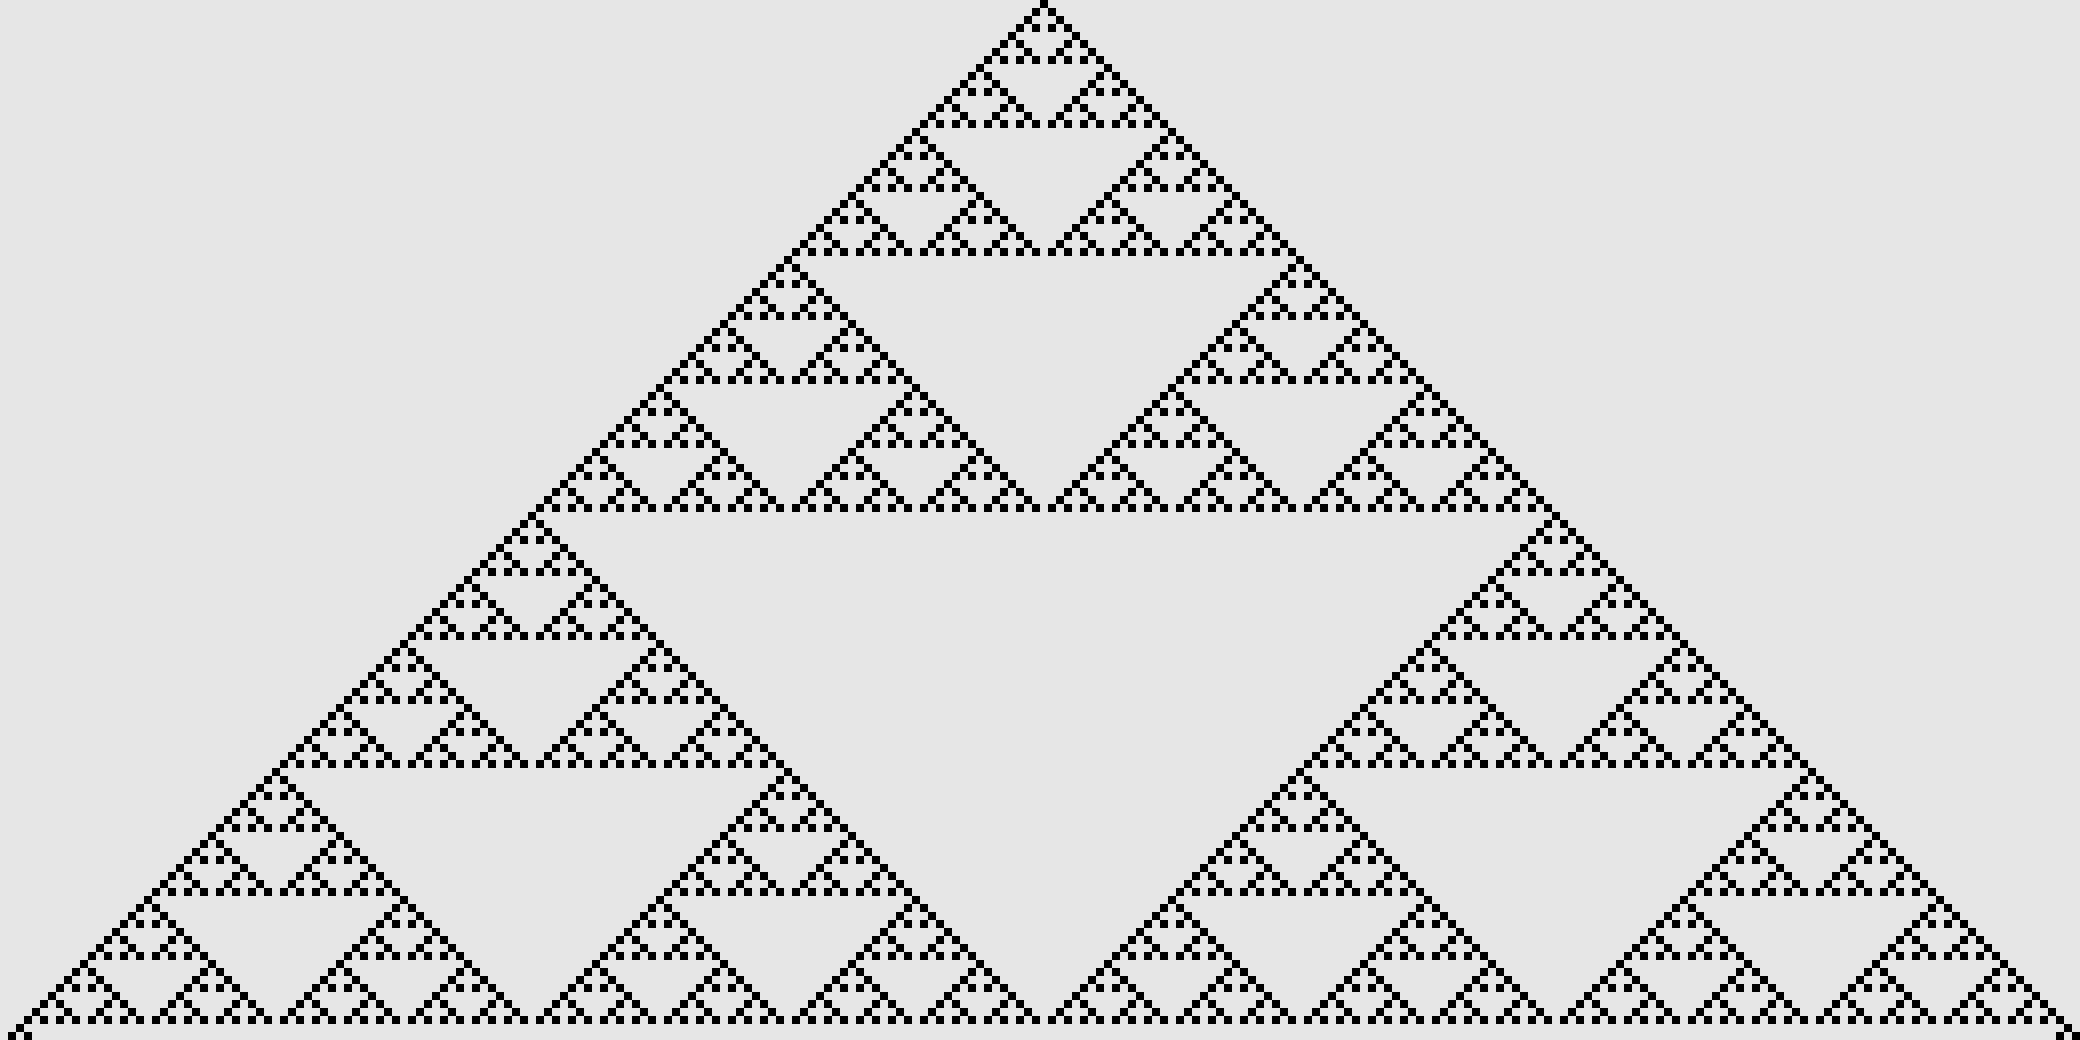

In [19]:
show(wolfram(90)(height=130, init=single_init))

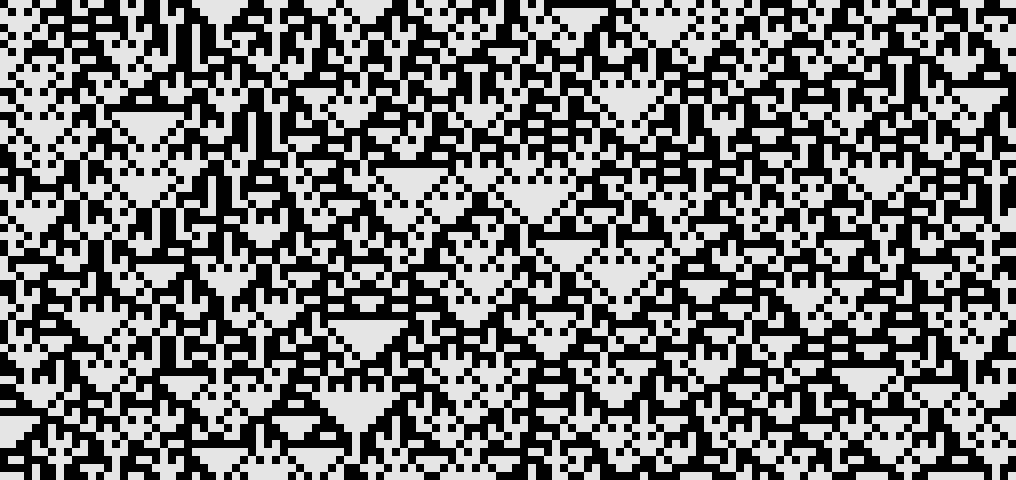

In [20]:
show(wolfram(90)(width=127,height=60, init=rand_init))

In [21]:
show(show_rule(wolfram(110)))

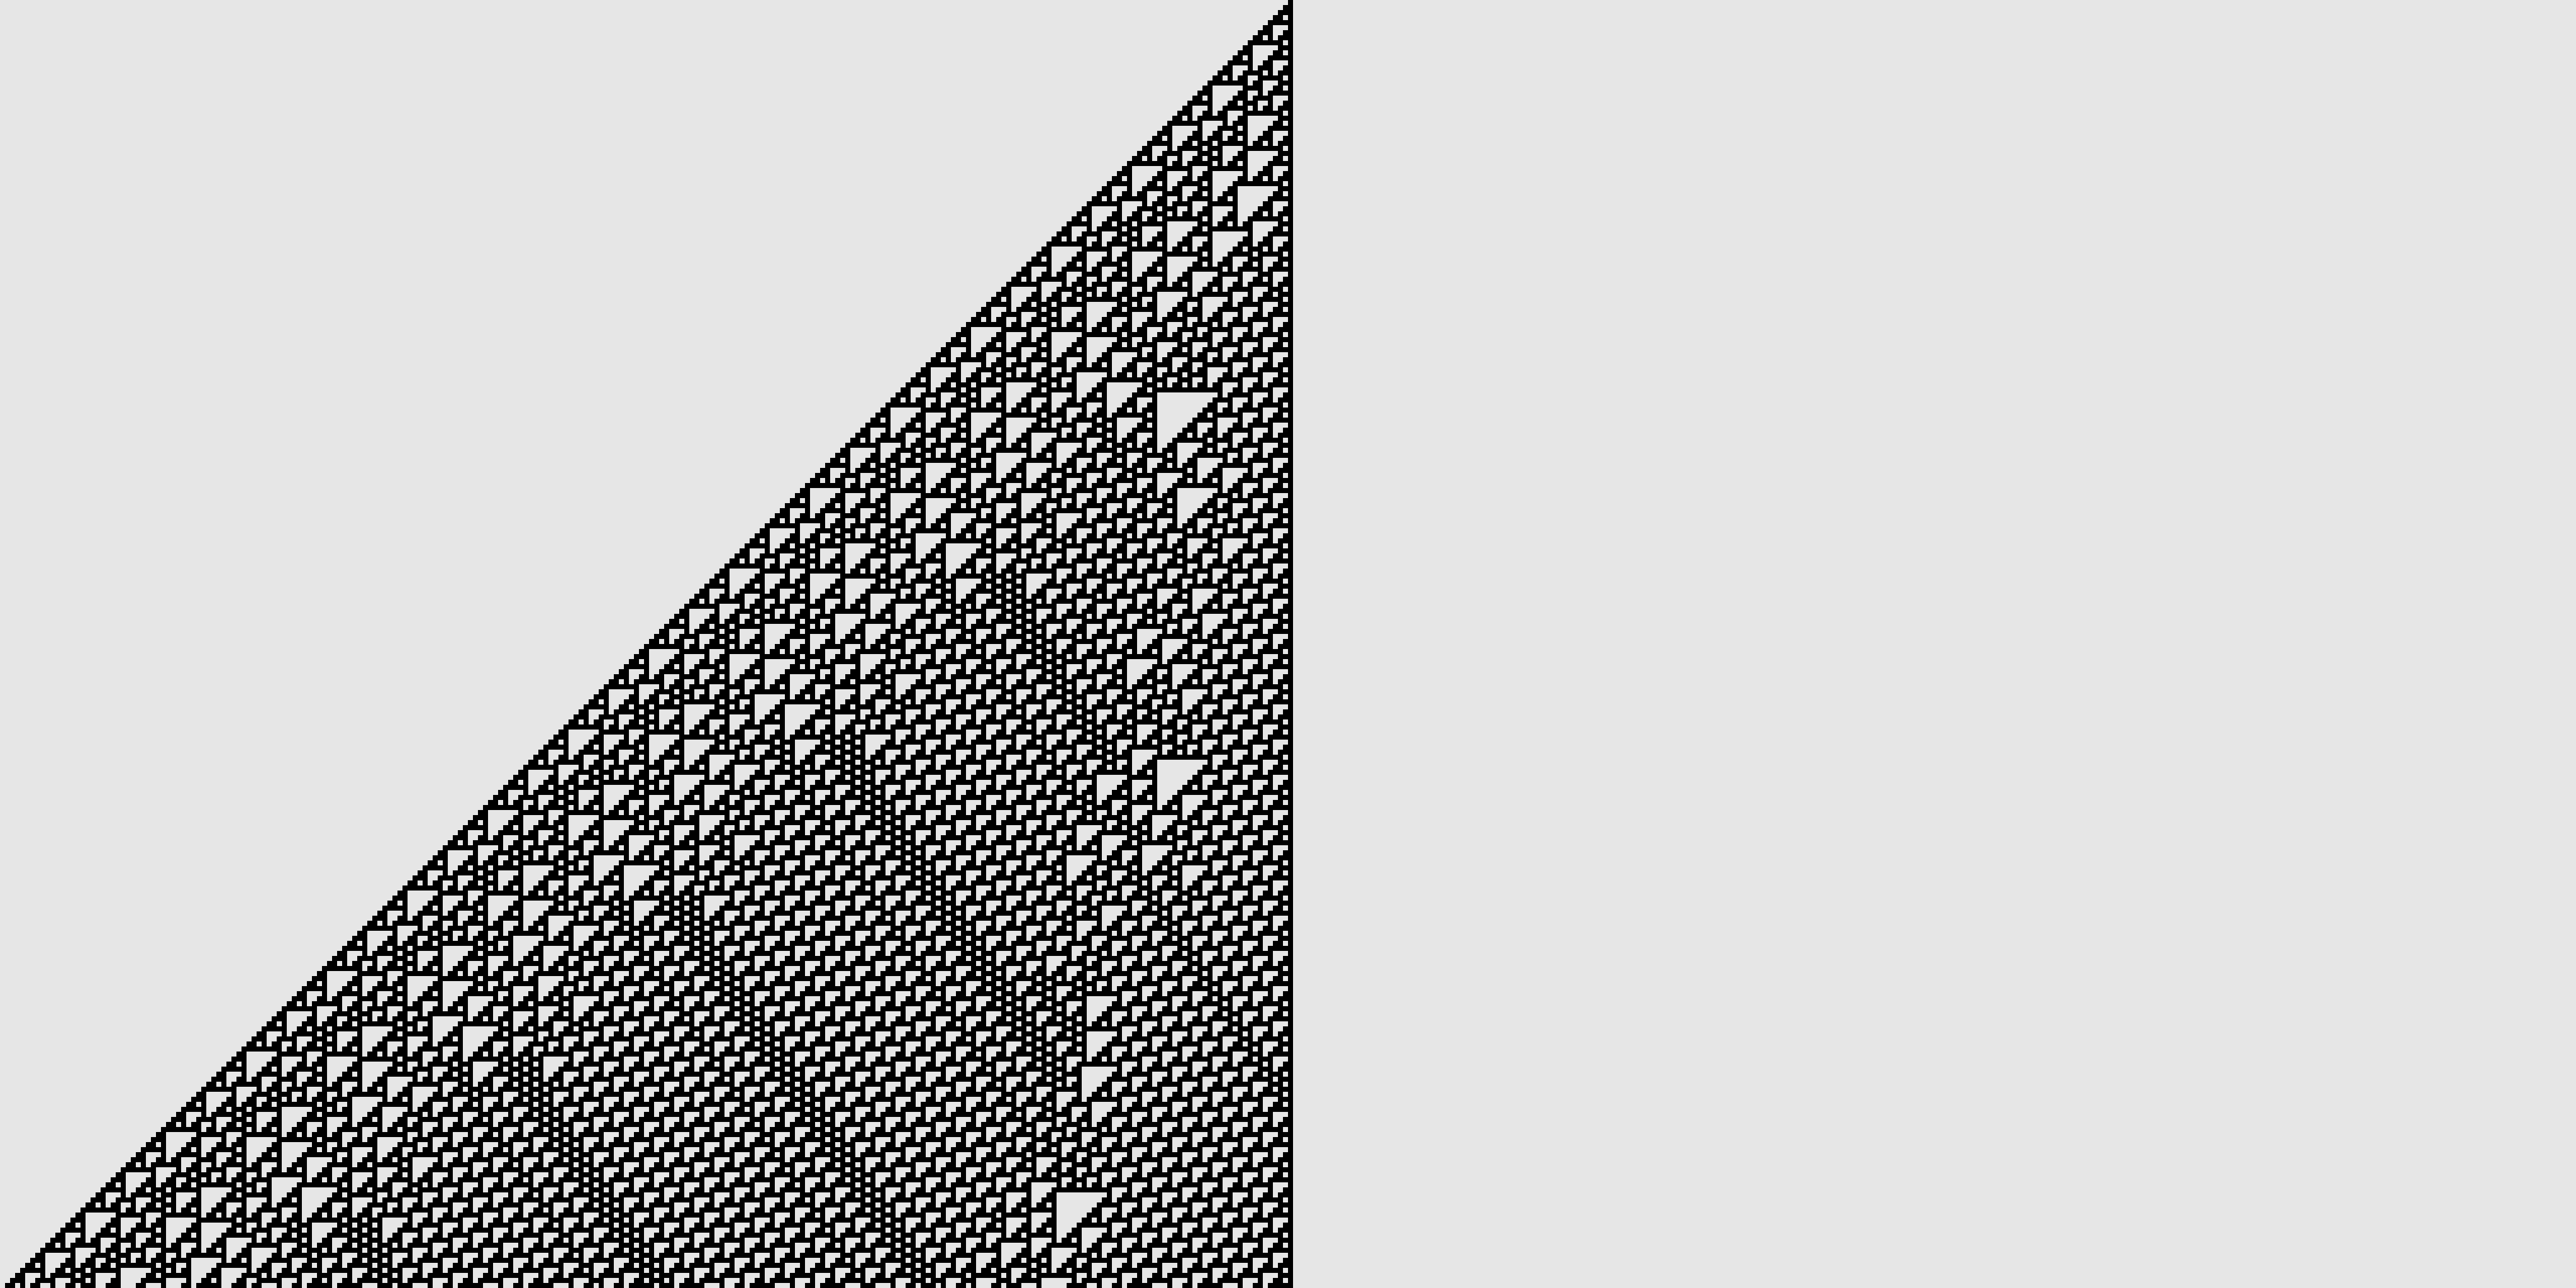

In [22]:
show(wolfram(110)(height=256))

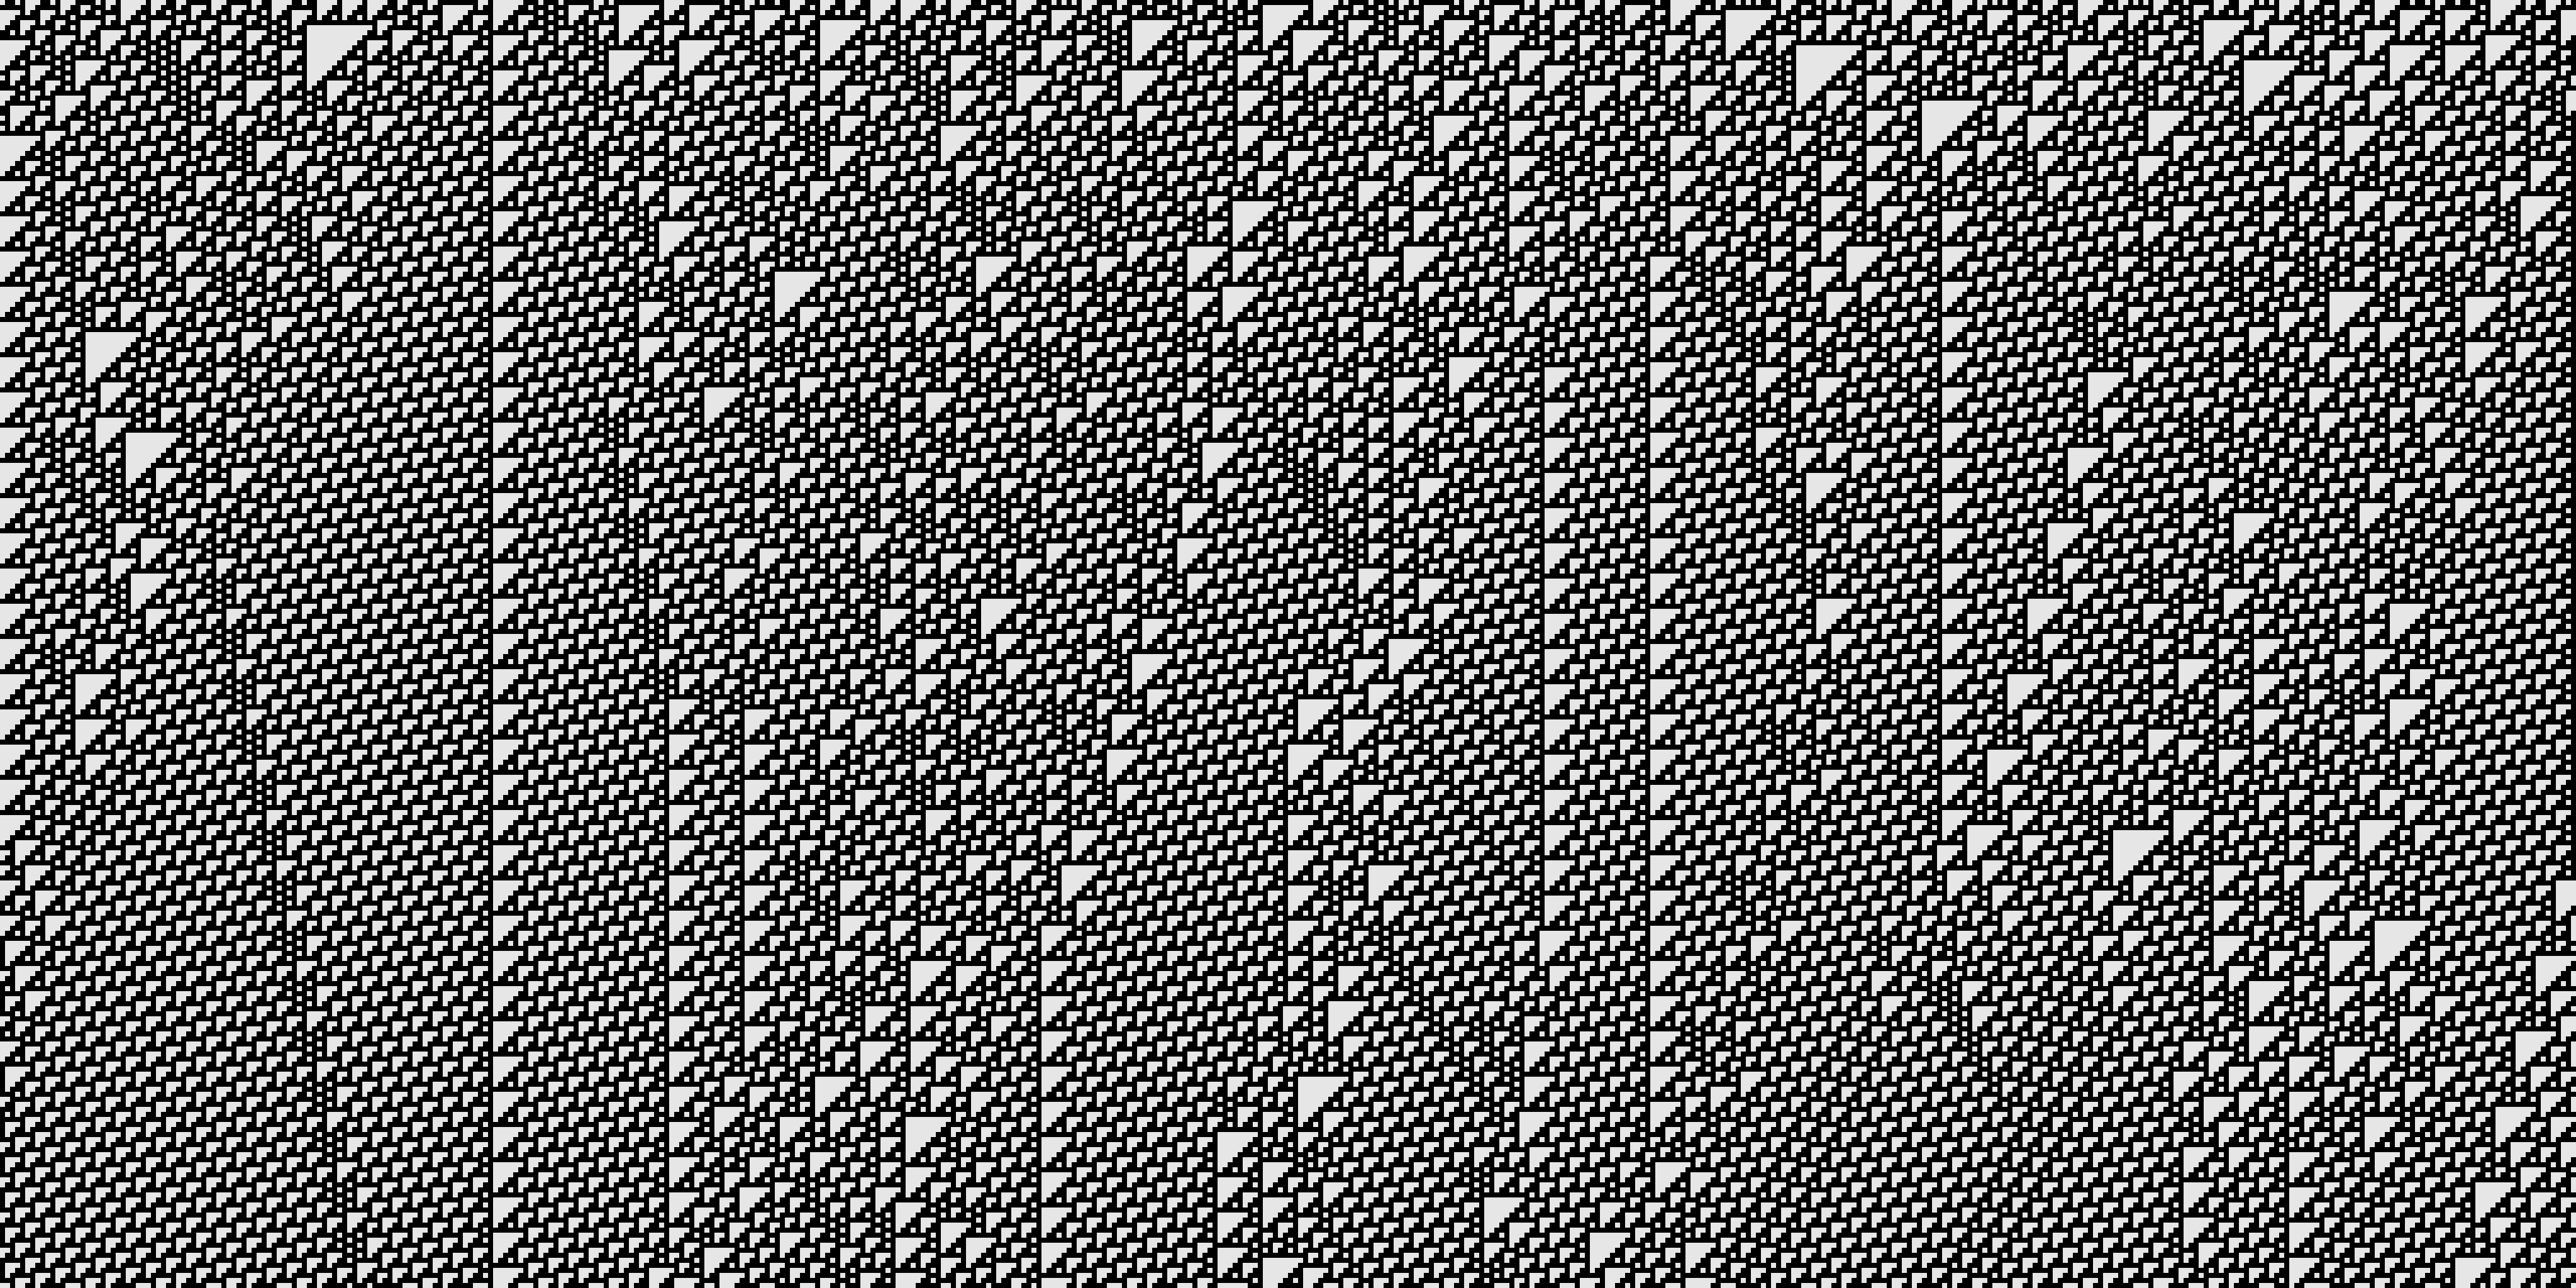

In [23]:
show(wolfram(110)(height=256, init=rand_init))

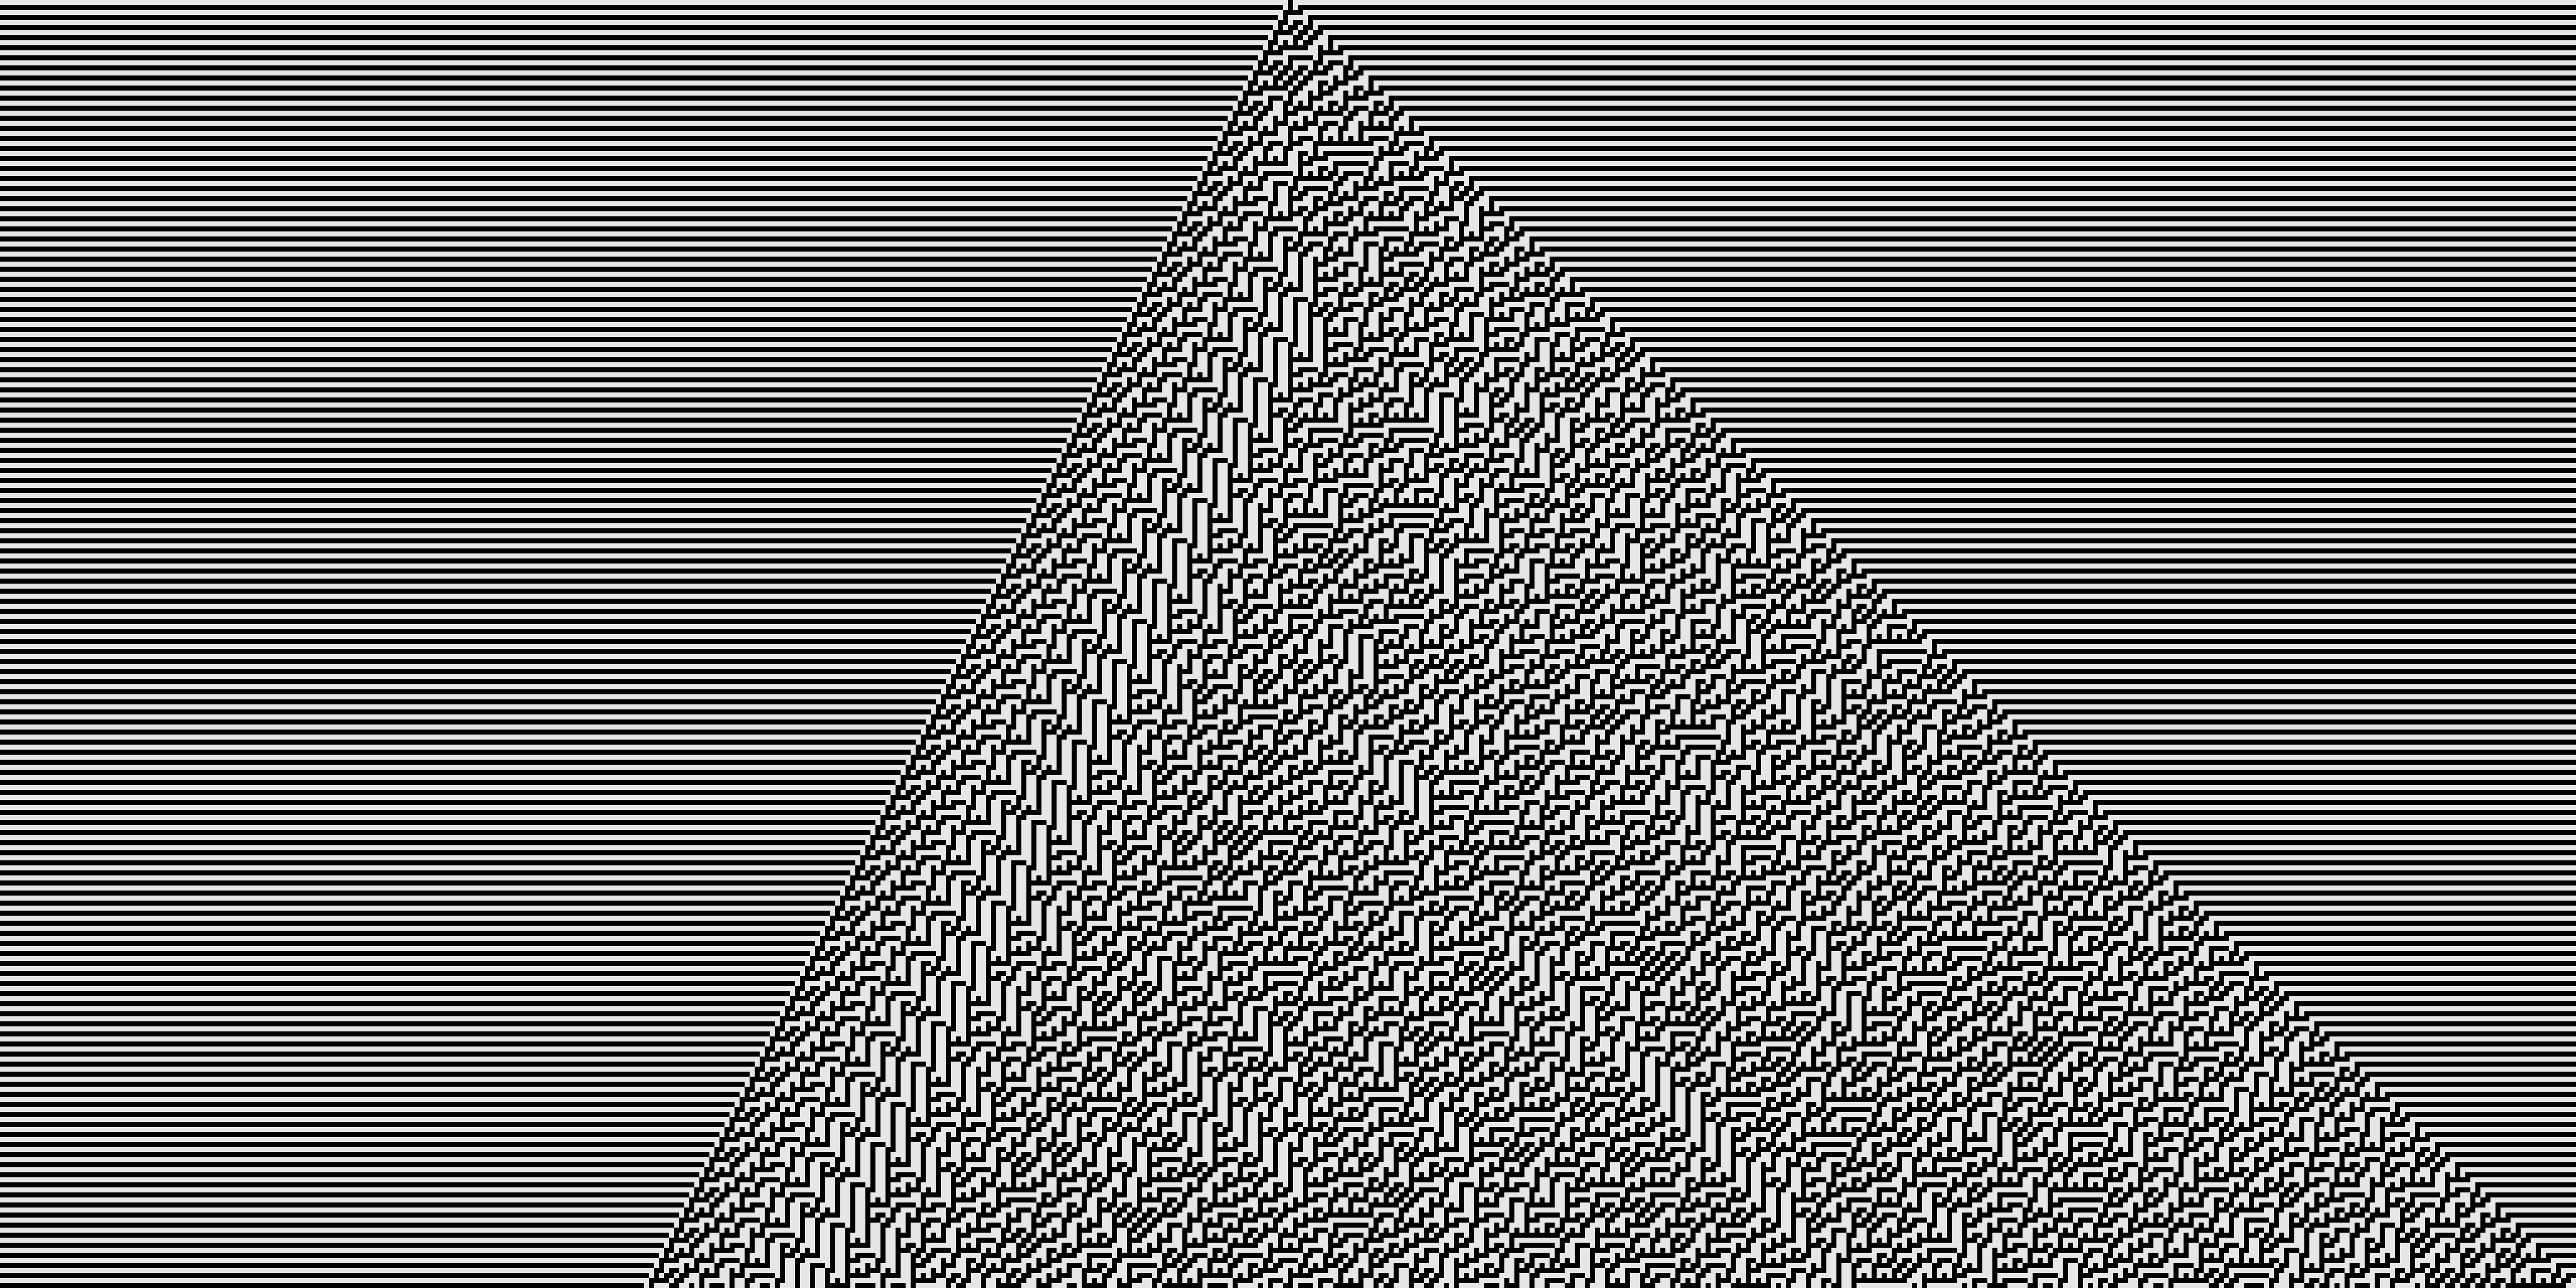

In [24]:
show(wolfram(45)(height=256))